# Model Evaluation and Comparison
This notebook loads all trained models and evaluates them on the test dataset using various performance metrics and visualizations.

In [61]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

X_test = pd.read_csv("../data/interim/X_test.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [62]:
logreg = joblib.load("../models/logreg_model.pkl")
svm = joblib.load("../models/svm_model.pkl")
knn = joblib.load("../models/knn_model.pkl")
tree = joblib.load("../models/tree_model.pkl")

scaler = joblib.load("../models/scaler.pkl")
X_test_scaled = scaler.transform(X_test)

In [63]:
def evaluate_model(name, model, X, y_true):
    y_pred = model.predict(X)
    
    print(f"{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

Logistic Regression
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



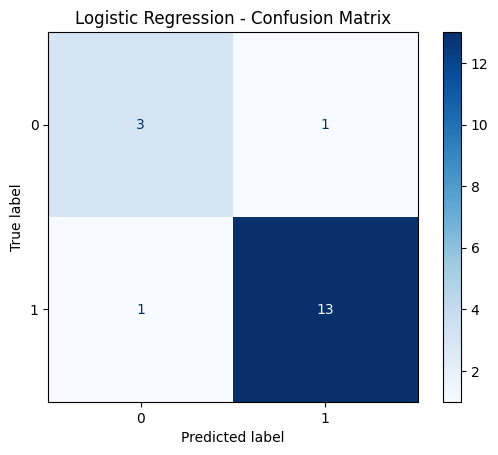

In [64]:
evaluate_model("Logistic Regression", logreg, X_test_scaled, y_test)

### Logistic Regression - Conclusion

Logistic Regression performed quite well, especially in identifying successful launches (Class 1). It correctly predicted 13 out of 14 successes. Only one false positive and one false negative occurred, suggesting solid class separation.
  
Class 0 (failures) had very few examples, which slightly lowered its performance. Still, the model handled the class imbalance reasonably well.

SVM
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18



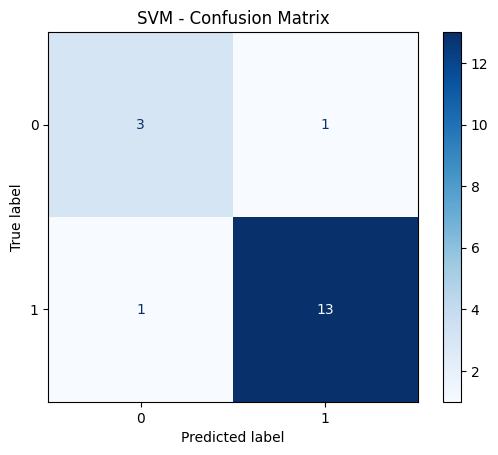

In [65]:
evaluate_model("SVM", svm, X_test_scaled, y_test)

### Support Vector Machine (SVM) - Conclusion

SVM mirrored the performance of Logistic Regression. It managed to capture patterns in both classes effectively and maintained a high precision-recall balance for the majority class.

Like Logistic Regression, the SVM struggled a bit with the minority class due to limited data points, which is expected in imbalanced datasets.

KNN
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.82      1.00      0.90        14

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18



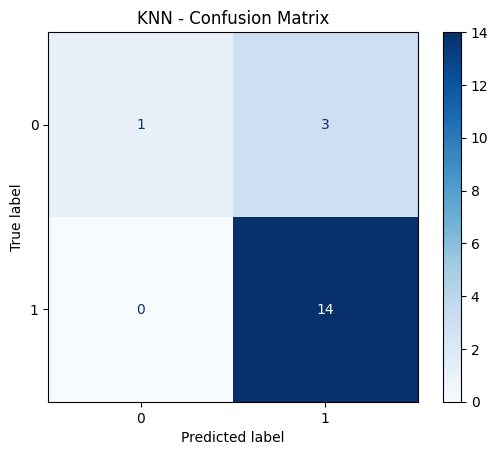

In [66]:
evaluate_model("KNN", knn, X_test_scaled, y_test)

### K-Nearest Neighbors (KNN) - Conclusion

KNN showed strong performance for Class 1 but performed poorly on Class 0. It misclassified 3 out of 4 failures, indicating that the model is biased toward the majority class.

Decision Tree
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.79      0.88        14

    accuracy                           0.83        18
   macro avg       0.79      0.89      0.80        18
weighted avg       0.90      0.83      0.85        18



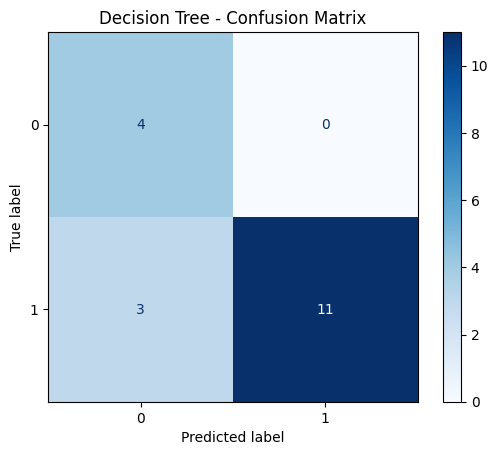

In [67]:
evaluate_model("Decision Tree", tree, X_test_scaled, y_test)

### Decision Tree - Conclusion
 
Decision Tree was the only model that perfectly identified all Class 0 samples. However, it made a few errors in predicting Class 1. This behavior shows a model trying to cover edge cases at the cost of precision for the majority.

This model appears more balanced between both classes. Further tuning (e.g., max depth, pruning) could potentially improve its generalization and control overfitting.
